In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [55]:
matA=[[0,1,1,1,1],[1,0,0,0,1],[1,0,0,0,0],[1,0,0,0,0],[1,1,0,0,0]]
Nv=len(matA)

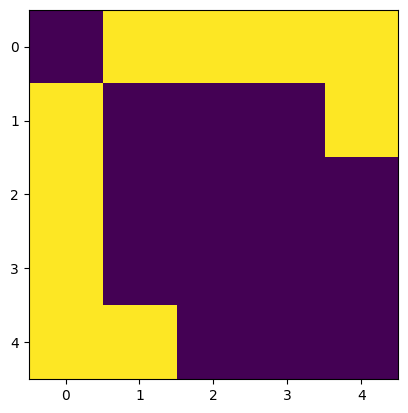

In [56]:
plt.imshow(matA)
plt.show()

In [19]:
def fun(t,y):
    R_list=[]
    for i in range(Nv):
        val=sum(matA[i][j]*np.sin(y[j]-y[i]) for j in range(Nv))
        R_list.append(val)
    return R_list

In [34]:
y0=2*np.pi*np.random.rand(Nv)
t_span=[0,10]
sol=solve_ivp(fun,t_span,y0,t_eval=np.linspace(t_span[0],t_span[1],1000))

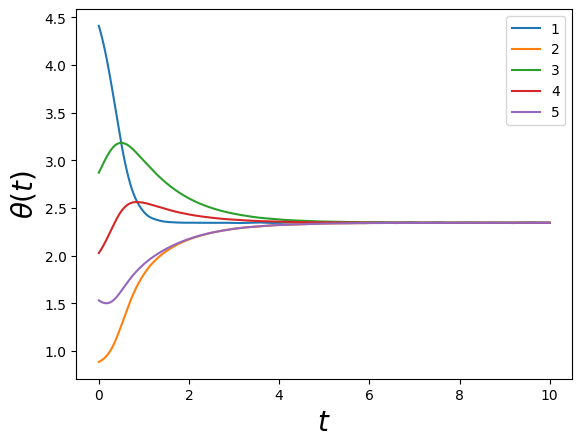

In [37]:
for i in range(Nv):
    plt.plot(sol.t,sol.y[i],'-',label=str(i+1))
plt.xlabel(r'$t$',size=20)
plt.ylabel(r'$\theta(t)$',size=20)
plt.legend(loc='upper right')
plt.show()

In [41]:
matA=[[0,1,0,0,1],[1,0,1,0,0],[0,1,0,1,0],[0,0,1,0,1],[1,0,0,1,0]]
Nv=len(matA)

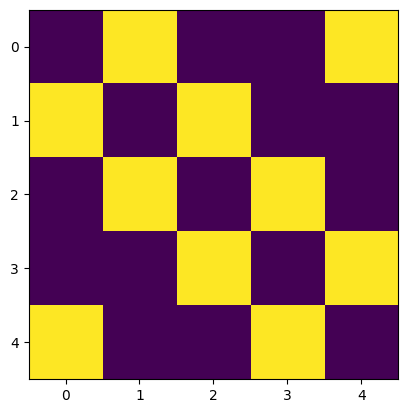

In [42]:
plt.imshow(matA)

In [49]:
y0=2*np.pi*np.random.rand(Nv)
t_span=[0,10]
sol=solve_ivp(fun,t_span,y0,t_eval=np.linspace(t_span[0],t_span[1],1000))

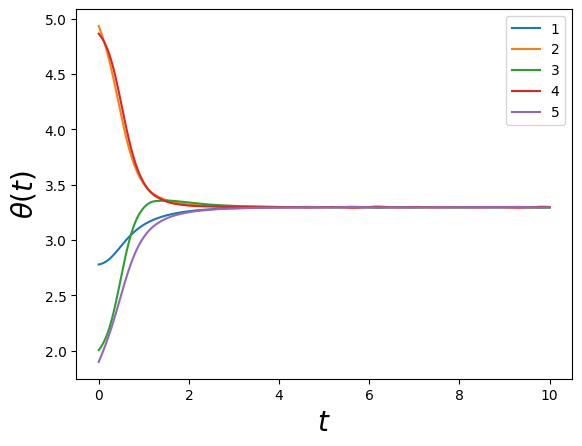

In [50]:
for i in range(Nv):
    plt.plot(sol.t,sol.y[i],'-',label=str(i+1))
plt.xlabel(r'$t$',size=20)
plt.ylabel(r'$\theta(t)$',size=20)
plt.legend(loc='upper right')
plt.show()

In [73]:
Nv=10
matA=np.zeros([Nv,Nv])
pc=0.2
for i in range(Nv):
    for j in range(i,Nv):
        matA[i][j]=np.random.choice([0,1],p=[pc,1-pc])
        matA[j][i]=matA[i][j]
    matA[i][i]=0

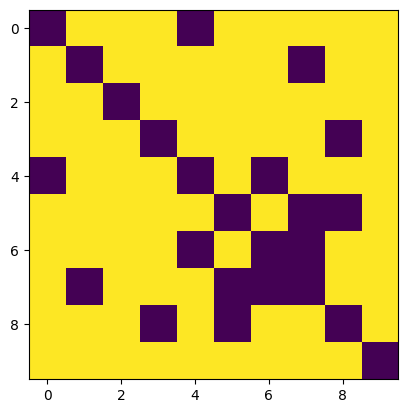

In [74]:
plt.imshow(matA)
plt.show()

In [71]:
def fun(t,y):
    R_list=[]
    for i in range(Nv):
        val=sum(matA[i][j]*np.sin(y[j]-y[i]) for j in range(Nv))
        R_list.append(val)
    return R_list


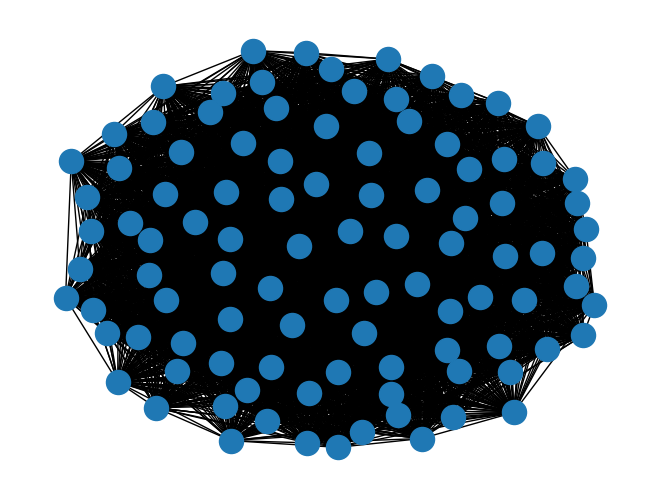

In [43]:
import networkx as nx
G=nx.from_numpy_array(matA)
nx.draw(G)

In [75]:
y0=2*np.pi*np.random.rand(Nv)
t_span=[0,1]
sol=solve_ivp(fun,t_span,y0,t_eval=np.linspace(t_span[0],t_span[1],1000))

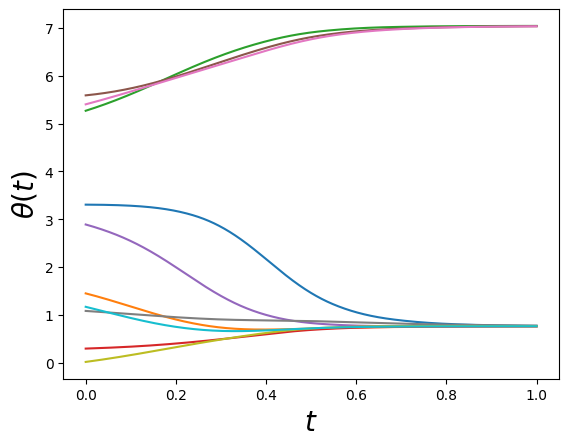

In [76]:
for i in range(Nv):
    plt.plot(sol.t,sol.y[i],'-')
plt.xlabel(r'$t$',size=20)
plt.ylabel(r'$\theta(t)$',size=20)
#plt.legend(loc='upper right')
plt.show()

In [93]:
r_synch=[]
for l in range(len(sol.t)):
    r_synch.append(abs(np.mean(np.exp(1j*sol.y).T[l])))

In [96]:
r_synch=np.zeros(len(sol.t),dtype=complex)

for i in range(Nv):
    r_synch+=np.exp(1j*sol.y)[i]
r_synch=abs(r_synch/Nv)


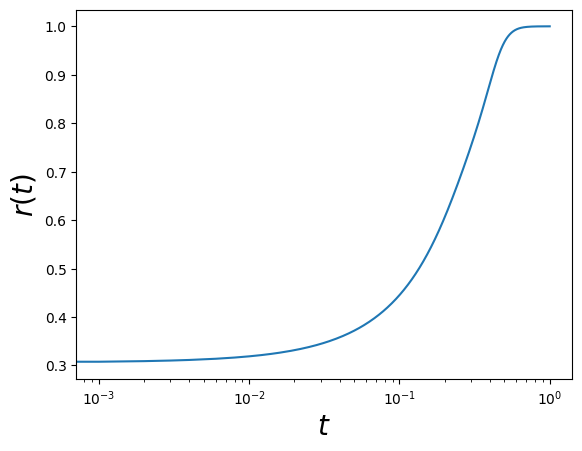

In [97]:
plt.semilogx(sol.t,r_synch)
plt.xlabel(r'$t$',size=20)
plt.ylabel(r'$r(t)$',size=20)
plt.show()